In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [2]:
# basic tools
import numpy as np
import pandas as pd
import re

# sklearn modeling tools
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin

# sklearn classifiers
# must have a predict_proba() functionality
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC

#sklearn evaluation tools
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
X_tokens = list(np.load('../00_data/encoded/add_tokens.npy'))
X_postags = list(np.load('../00_data/encoded/add_postags.npy'))
y_speechacts = list(np.load('../00_data/encoded/add_speechacts.npy'))
y_topics = list(np.load('../00_data/encoded/add_topics.npy'))
encoder = LabelEncoder()
encoder.fit(y_speechacts)
tencoder = LabelEncoder()
tencoder.fit(y_topics)

LabelEncoder()

In [4]:
split_idx = int(len(X_tokens)*0.9)
X_train_sents = X_tokens[:split_idx]
X_train_pos = X_postags[:split_idx]
X_test_sents = X_tokens[split_idx:]
X_test_pos = X_postags[split_idx:]
y_train_sacts = y_speechacts[:split_idx]
y_test_sacts = y_speechacts[split_idx:]
y_train_topics = y_topics[:split_idx]
y_test_topics = y_topics[split_idx:]

X_train = [' '.join(s) for s in X_train_sents]
X_test = [' '.join(s) for s in X_test_sents]
y_train = encoder.transform(y_train_sacts)
y_test = encoder.transform(y_test_sacts)
y_ttrain = tencoder.transform(y_train_topics)
y_ttest = tencoder.transform(y_test_topics)

## speech-act classification

In [5]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

In [6]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [9]:
tpreds = pipeline.predict(X_train)
txttpreds = encoder.inverse_transform(tpreds)
preds = pipeline.predict(X_test)
txtpreds = encoder.inverse_transform(preds)

In [10]:
print("train precision", precision_score(y_train_sacts, txttpreds, average='macro'))
print("train recall   ", recall_score(y_train_sacts, txttpreds, average='macro'))
print("train accuracy ", accuracy_score(y_train_sacts, txttpreds))
print('')
print("test precision", precision_score(y_test_sacts, txtpreds, average='macro'))
print("test recall   ", recall_score(y_test_sacts, txtpreds, average='macro'))
print("test accuracy ", accuracy_score(y_test_sacts, txtpreds))

train precision 0.843945255398
train recall    0.726487430623
train accuracy  0.871683309558

test precision 0.764387869858
test recall    0.722603761044
test accuracy  0.809370988447


/home/derek/anaconda3/envs/core_eng/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## topic classification

In [11]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

In [12]:
pipeline.fit(X_train, y_ttrain)

Pipeline(steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [15]:
tpreds = pipeline.predict(X_train)
txttpreds = tencoder.inverse_transform(tpreds)
preds = pipeline.predict(X_test)
txtpreds = tencoder.inverse_transform(preds)

In [16]:
print("train precision", precision_score(y_train_topics, txttpreds, average='macro'))
print("train recall   ", recall_score(y_train_topics, txttpreds, average='macro'))
print("train accuracy ", accuracy_score(y_train_topics, txttpreds))
print('')
print("test precision", precision_score(y_test_topics, txtpreds, average='macro'))
print("test recall   ", recall_score(y_test_topics, txtpreds, average='macro'))
print("test accuracy ", accuracy_score(y_test_topics, txtpreds))
print('')

train precision 0.882497828431
train recall    0.838802577875
train accuracy  0.934236804565

test precision 0.86166845483
test recall    0.814780976901
test accuracy  0.885750962773



/home/derek/anaconda3/envs/core_eng/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/derek/anaconda3/envs/core_eng/lib/python3.6/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## analysis

In [17]:
from collections import Counter
sac = Counter(y_speechacts)
sat = list(sac.most_common())
word = [t[0] for t in sat]
frequency = [t[1] for t in sat]

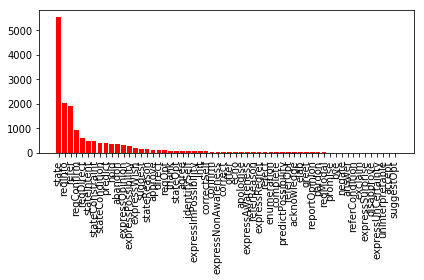

In [18]:
indices = np.arange(len(sat))
plt.bar(indices, frequency, color='r')
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.show()

In [19]:
top_score = [1.0 if x == 'state' else 0.0 for x in y_speechacts ]

In [20]:
sum(top_score)/len(top_score)

0.3560790858903582

In [21]:
top_x = list(sac.most_common(24))
top_x = [x[0] for x in top_x]

In [22]:
trunc_acts = [label if label in top_x else 'ood' for label in y_speechacts]

In [23]:
Counter(trunc_acts)

Counter({'abandon': 332,
         'agree': 61,
         'approve': 105,
         'direct': 97,
         'expressImPossibility': 58,
         'expressOpinion': 309,
         'expressPossibility': 274,
         'expressWish': 171,
         'hold': 340,
         'identifySelf': 60,
         'ood': 449,
         'predict': 373,
         'refer': 1916,
         'reqConfirm': 910,
         'reqDirect': 614,
         'reqInfo': 2016,
         'reqOpt': 86,
         'state': 5547,
         'stateCondition': 403,
         'stateConstraint': 486,
         'stateIntent': 491,
         'stateOpt': 80,
         'stateReason': 159,
         'suggest': 160,
         'thank': 81})